# Exploring Moscow weather-forecast dataset 
### The data is taken from:
### https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B5_(%D0%92%D0%94%D0%9D%D0%A5)

#### period of time: 04.03.2015 - 04.03.2020

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from pandas.plotting import autocorrelation_plot

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_excel('Мск_5лет.xls', skiprows=6)[::-1] # opening the dataset and saving it to the variable

In [3]:
data #observing the data

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
16674,04.03.2015 00:00,0.6,747.4,762.3,-0.2,90.0,"Ветер, дующий с юго-юго-востока",3,NaN,NaN,...,NaN,NaN,NaN,-0.9,NaN,NaN,NaN,NaN,NaN,NaN
16673,04.03.2015 01:00,0.7,747.4,762.3,-0.3,90.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,...,NaN,NaN,NaN,-0.7,NaN,NaN,NaN,NaN,NaN,NaN
16672,04.03.2015 02:00,0.9,747.4,762.2,0.0,88.0,"Ветер, дующий с юго-юго-востока",2,NaN,NaN,...,NaN,NaN,NaN,-0.9,NaN,NaN,NaN,NaN,NaN,NaN
16671,04.03.2015 03:00,0.8,747.2,762.1,-0.2,87.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,...,NaN,NaN,NaN,-1.1,NaN,NaN,NaN,NaN,NaN,NaN
16670,04.03.2015 04:00,0.7,747.2,762.1,-0.2,86.0,"Ветер, дующий с юго-юго-востока",2,NaN,NaN,...,NaN,NaN,NaN,-1.4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,04.03.2020 03:00,3.4,746.5,761.1,0.9,95.0,"Штиль, безветрие",0,NaN,NaN,...,NaN,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN
3,04.03.2020 06:00,3.3,747.1,761.8,0.6,97.0,"Ветер, дующий с юго-востока",1,NaN,NaN,...,NaN,NaN,NaN,2.9,0.1,12.0,NaN,NaN,NaN,NaN
2,04.03.2020 09:00,3.7,748.5,763.2,1.4,97.0,"Штиль, безветрие",0,NaN,NaN,...,NaN,NaN,1.0,3.3,Осадков нет,12.0,NaN,NaN,Слежавшийся или мокрый снег (со льдом или без ...,Менее 0.5
1,04.03.2020 12:00,6.2,749.0,763.6,0.5,83.0,"Ветер, дующий с востока",1,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN


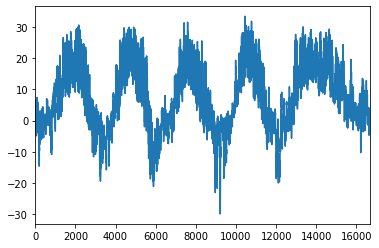

In [4]:
data['T'].plot() # getting a plot of the column 'T' (=temperature)

In [5]:
# converting string to datetime
data.index = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], format='%d.%m.%Y %H:%M')

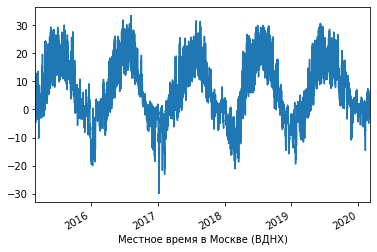

In [6]:
data['T'].plot() # now instead of numbers we can see years 

In [7]:
# keeping the info only for 12 o'clock of each day
mask = data.index.hour == 12 
data = data[mask]

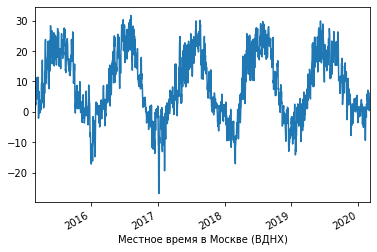

In [8]:
data['T'].plot()

In [9]:
data['T'].max() # max temperature

31.7

In [10]:
data['T'].min() # min temperature

-26.9

In [11]:
data['T'].mean() # mean temperature

8.878106185002734

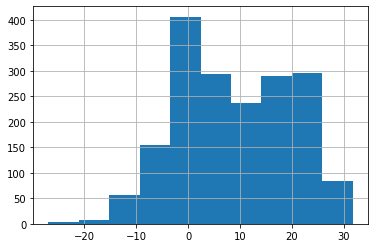

In [12]:
data['T'].hist() # observing the histogram of the temperature

In [13]:
# keeping track of the outliers
quantile_95 = data['T'].quantile(0.95) 
quantile_05 = data['T'].quantile(0.05)

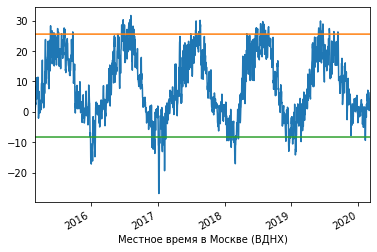

In [14]:
data['T'].plot()
plt.plot(data.index, [quantile_95] * len(data.index)) # yellow line
plt.plot(data.index, [quantile_05] * len(data.index)) # green line

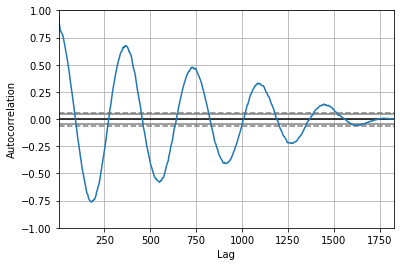

In [15]:
autocorrelation_plot(data['T'])

In [16]:
# we can observe the correlation between seasons and temperature
# every +-365 days the temperature values repeat themselves

### Building a regression model on the data

In [17]:
regressor = LinearRegression() # creating a classifier object

In [18]:
x_range = list(range(len(data))) # generating a list of numbers from 0 to 16675

In [19]:
regressor.fit(pd.DataFrame(x_range), data['T'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

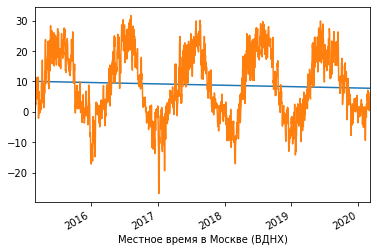

In [20]:
plt.plot(data.index, regressor.predict(pd.DataFrame(x_range)))
data['T'].plot()